In [50]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [2]:
# load the data for startups
startups = (pd.read_csv('Startup Data/startup_raw.csv'))
# get rid of commas so they can be converted to integers
for column in startups.columns:
    # Check if the column contains string data type
    if startups[column].dtype == 'object':
        # Replace commas with an empty string in the column
        startups[column] = startups[column].str.replace(',', '')

startups 

,Year Ended,Surviving Establishments,Total Employment of Survivors,Survival Rates Since Birth (%),Labor Force Participation Rate (%)
0,2015.0,677876,3011469,100.0,4.4
1,2016.0,539701,3073279,79.6,5.7
2,2017.0,468293,3081916,69.1,6.6
3,2018.0,416438,3075769,61.4,7.4
4,2019.0,375833,3043285,55.4,8.1
...,...,...,...,...,...
62,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN


In [3]:
# filter to include only the years that have a 100% survival rate to show how many startups were made that year
startups_started = startups[startups['Survival Rates Since Birth (%)'] == 100]

# making the year column an integer for merge
startups_started = startups_started.rename(columns={'Year Ended' : 'year'})
startups_started = startups_started.rename(columns={'Surviving Establishments' : 'Surviving_Establishments'})
startups_started['Surviving_Establishments'] = startups_started['Surviving_Establishments'].astype(float)                                                          
startups_started

,year,Surviving_Establishments,Total Employment of Survivors,Survival Rates Since Birth (%),Labor Force Participation Rate (%)
0,2015.0,677876.0,3011469,100.0,4.4
9,2016.0,732856.0,3130736,100.0,4.3
17,2017.0,733286.0,3111021,100.0,4.2
24,2018.0,733721.0,3090584,100.0,4.2
29,2019.0,770523.0,3116850,100.0,4.0
34,2020.0,767573.0,3063425,100.0,4.0
38,2021.0,839297.0,2985309,100.0,3.6
41,2022.0,1065228.0,3697739,100.0,3.5
43,2023.0,1054052.0,3710694,100.0,3.5


In [4]:
# Filtering the startups to only have the year and number of establishments

selected_columns = ['year', 'Surviving_Establishments']
startups_numbers  = startups_started[selected_columns]
startups_numbers.to_csv('Startup Data/startup_numbers.csv', index=False)

In [5]:
# Load work from home dataset

WFH_Data = pd.read_csv('Work From Home Data/WFH 1965-present.csv')
#WFH_Data.head(50)
WFH_Data = WFH_Data.drop(columns = ['License', 'Citation'])

In [6]:
# converting the year into a format that can be merged on
WFH_Data['date'] = pd.to_datetime(WFH_Data['date'])
WFH_Data['year'] = WFH_Data['date'].dt.strftime('%Y')
WFH_Data.tail(55)

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
14,2011-01-01,4.6,ATUS,3.0,ACS,NaN,2011
15,2012-01-01,5.7,ATUS,3.1,ACS,NaN,2012
16,2013-01-01,5.4,ATUS,3.2,ACS,NaN,2013
17,2014-01-01,6.4,ATUS,3.3,ACS,NaN,2014
18,2015-01-01,6.8,ATUS,3.5,ACS,NaN,2015
19,2016-01-01,5.9,ATUS,3.9,ACS,NaN,2016
20,2017-01-01,6.9,ATUS,4.1,ACS,NaN,2017
21,2018-01-01,5.3,ATUS,4.2,ACS,NaN,2018
22,2019-01-01,7.2,ATUS,4.7,ACS,NaN,2019
23,2020-05-01,61.5,SWAA,NaN,NaN,NaN,2020


In [7]:
# only need years 2015 onward
filtered_WFH = WFH_Data.iloc[18:23]
filtered_WFH

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
18,2015-01-01,6.8,ATUS,3.5,ACS,NaN,2015
19,2016-01-01,5.9,ATUS,3.9,ACS,NaN,2016
20,2017-01-01,6.9,ATUS,4.1,ACS,NaN,2017
21,2018-01-01,5.3,ATUS,4.2,ACS,NaN,2018
22,2019-01-01,7.2,ATUS,4.7,ACS,NaN,2019


In [8]:
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2020', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2020 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2021', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2021 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2022', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2022 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2023', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2023 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2024', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2024 ] 
WFH_Data

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
0,1965-01-01 00:00:00,0.4,AHTUS,NaN,NaN,NaN,1965
1,1975-01-01 00:00:00,0.6,AHTUS,NaN,NaN,NaN,1975
2,1985-01-01 00:00:00,4.8,AHTUS,NaN,NaN,NaN,1985
3,1993-01-01 00:00:00,2.5,AHTUS,NaN,NaN,NaN,1993
4,1995-01-01 00:00:00,2.2,AHTUS,NaN,NaN,NaN,1995
...,...,...,...,...,...,...,...
69,NaN,46.3,NaN,NaN,NaN,NaN,2020
70,NaN,33.6,NaN,NaN,NaN,NaN,2021
71,NaN,30.3,NaN,NaN,NaN,NaN,2022
72,NaN,28.8,NaN,NaN,NaN,NaN,2023


In [9]:
WFH_Data.tail(10)

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
64,2023-11-01 00:00:00,28.6,SWAA,NaN,NaN,NaN,2023
65,2023-12-01 00:00:00,29.5,SWAA,NaN,NaN,NaN,2023
66,2024-01-01 00:00:00,28.8,SWAA,NaN,NaN,NaN,2024
67,2024-02-01 00:00:00,27.8,SWAA,NaN,NaN,NaN,2024
68,2024-03-01 00:00:00,27.5,SWAA,NaN,NaN,NaN,2024
69,NaN,46.3,NaN,NaN,NaN,NaN,2020
70,NaN,33.6,NaN,NaN,NaN,NaN,2021
71,NaN,30.3,NaN,NaN,NaN,NaN,2022
72,NaN,28.8,NaN,NaN,NaN,NaN,2023
73,NaN,28.0,NaN,NaN,NaN,NaN,2024


In [10]:
filtered_WFH = filtered_WFH.reset_index()

In [11]:
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2020]])
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2021]])
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2022]])
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2023]])
# filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2024]])
filtered_WFH = filtered_WFH.drop_duplicates()
filtered_WFH

,index,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
0,18.0,2015-01-01 00:00:00,6.8,ATUS,3.5,ACS,NaN,2015
1,19.0,2016-01-01 00:00:00,5.9,ATUS,3.9,ACS,NaN,2016
2,20.0,2017-01-01 00:00:00,6.9,ATUS,4.1,ACS,NaN,2017
3,21.0,2018-01-01 00:00:00,5.3,ATUS,4.2,ACS,NaN,2018
4,22.0,2019-01-01 00:00:00,7.2,ATUS,4.7,ACS,NaN,2019
69,NaN,NaN,46.3,NaN,NaN,NaN,NaN,2020
70,NaN,NaN,33.6,NaN,NaN,NaN,NaN,2021
71,NaN,NaN,30.3,NaN,NaN,NaN,NaN,2022
72,NaN,NaN,28.8,NaN,NaN,NaN,NaN,2023


In [12]:
filtered_WFH.dtypes

index                       float64
date                         object
WFH_share                    object
Source_historical_series     object
fullremote_hist              object
Source_fullremote_hist       object
Notes                        object
year                         object
dtype: object

In [13]:
filtered_WFH['year'] = filtered_WFH['year'].astype(float)
filtered_WFH['WFH_share'] = filtered_WFH['WFH_share'].astype(float)

In [14]:
filtered_WFH.to_csv('Work From Home Data/cleaned_WFH.csv',index=False)

In [15]:
# Merge our Datasets

wfh_startups = pd.merge(filtered_WFH,
                        startups_numbers,
                        on = ['year'],
                        how = 'left',
                        validate = '1:1')
wfh_startups

,index,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year,Surviving_Establishments
0,18.0,2015-01-01 00:00:00,6.8,ATUS,3.5,ACS,NaN,2015.0,677876.0
1,19.0,2016-01-01 00:00:00,5.9,ATUS,3.9,ACS,NaN,2016.0,732856.0
2,20.0,2017-01-01 00:00:00,6.9,ATUS,4.1,ACS,NaN,2017.0,733286.0
3,21.0,2018-01-01 00:00:00,5.3,ATUS,4.2,ACS,NaN,2018.0,733721.0
4,22.0,2019-01-01 00:00:00,7.2,ATUS,4.7,ACS,NaN,2019.0,770523.0
5,NaN,NaN,46.3,NaN,NaN,NaN,NaN,2020.0,767573.0
6,NaN,NaN,33.6,NaN,NaN,NaN,NaN,2021.0,839297.0
7,NaN,NaN,30.3,NaN,NaN,NaN,NaN,2022.0,1065228.0
8,NaN,NaN,28.8,NaN,NaN,NaN,NaN,2023.0,1054052.0


In [16]:
wfh_startups.dtypes

index                       float64
date                         object
WFH_share                   float64
Source_historical_series     object
fullremote_hist              object
Source_fullremote_hist       object
Notes                        object
year                        float64
Surviving_Establishments    float64
dtype: object

In [17]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col  # Importing summary_col function
# regression model to show the relationship between the WFH share of the workforce and the number of startups created

# Run OLS
m1 = sm.OLS.from_formula('Surviving_Establishments ~ WFH_share', data=wfh_startups).fit()
m2 = sm.OLS.from_formula('Surviving_Establishments ~ np.log(WFH_share)', data=wfh_startups).fit()  # Use np.log for log transformation
m3 = sm.OLS.from_formula('np.log(Surviving_Establishments) ~ WFH_share', data=wfh_startups).fit()  # Log transform dependent variable

# Print out multiple regression results at once
table = summary_col(results=[m1, m2, m3],
                    float_format='%0.2f',
                    stars=True,
                    model_names=['m1', 'm2', 'm3'],
                    info_dict=None)  # You can pass additional information here if needed

print(table)



                       m1           m2         m3   
----------------------------------------------------
Intercept         726959.06*** 550347.72*** 13.49***
                  (69964.78)   (124714.63)  (0.08)  
WFH_share         4861.37                   0.01    
                  (2902.69)                 (0.00)  
np.log(WFH_share)              103533.89*           
                               (45633.30)           
R-squared         0.29         0.42         0.31    
R-squared Adj.    0.18         0.34         0.21    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


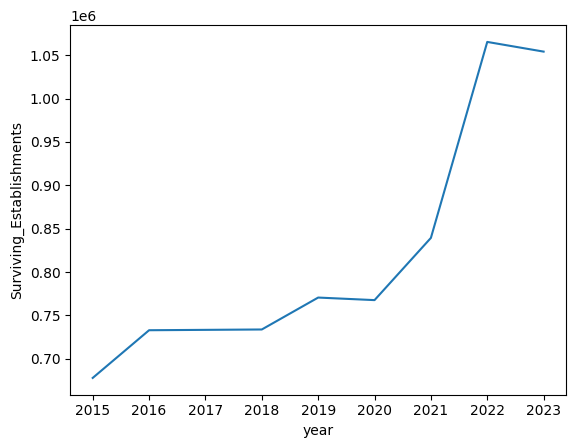

In [18]:
lineplot1 = sns.lineplot(data = wfh_startups,
             x='year',y='Surviving_Establishments') #style='gsector'

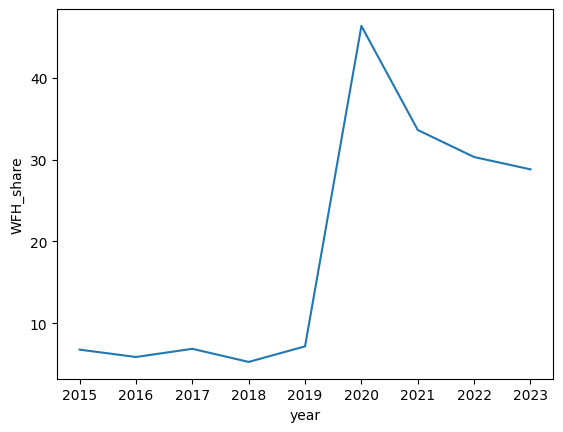

In [19]:
lineplot2 = sns.lineplot(data = wfh_startups,
             x='year',y='WFH_share') #style='gsector'

In [20]:
#lineplot3 = sns.lineplot(data = wfh_startups,
 #            x='log_wfh%',y='startups',hue='high_leverage') #style='gsector'

Industries focused on
- utilities (NAICS22)
- Finance and Insurance (NAICS52)
- Wholesale trade (NAICS42)
- Transportation and Warehousing (NAICSTW)
- Real Estate (NAICS53)
- Arts and Entertainment (NAICS71)

In [21]:
# Now finding Monthly Startup development by industry
# load datasets
startup_ind =  (pd.read_csv('Startup Data/Industry/bfs_monthly.csv'))

C:\Users\keith\AppData\Local\Temp\ipykernel_33392\1077236181.py:3: DtypeWarning: Columns (5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  startup_ind =  (pd.read_csv('Startup Data/Industry/bfs_monthly.csv'))


In [22]:
startup_ind= startup_ind.sort_values(by='year')

# Reset the index after sorting
startup_ind.reset_index(drop=True, inplace=True)
startup_ind

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,U,TOTAL,BF_DUR8Q,WY,2004,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.90,1.43,1.09,0.89,1.51
1,U,TOTAL,BA_WBA,MI,2004,NaN,NaN,NaN,NaN,NaN,NaN,1820,1883,1792,2104,1802,2405
2,A,TOTAL,BA_WBA,MI,2004,NaN,NaN,NaN,NaN,NaN,NaN,1795,2170,2209,1967,2135,2054
3,U,TOTAL,BA_WBA,MN,2004,NaN,NaN,NaN,NaN,NaN,NaN,1038,1015,864,1278,895,1101
4,A,TOTAL,BA_WBA,MN,2004,NaN,NaN,NaN,NaN,NaN,NaN,1058,1220,1139,1307,1159,995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33055,A,TOTAL,BF_PBF8Q,AK,2024,86,75,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33056,U,TOTAL,BF_PBF8Q,AZ,2024,1198,825,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33057,A,TOTAL,BF_PBF8Q,AZ,2024,845,831,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33058,U,TOTAL,BF_PBF8Q,WE,2024,15800,11072,11234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# replacing the names of the naics_sector to more cleanly describe our industries
# Define a dictionary mapping NAICS codes to the corresponding sectors
naics_mapping = {
    'NAICS22': 'Utilities',
    'NAICS52': 'Finance and Insurance',
    'NAICS42': 'Wholesale Trade',
    'NAICSTW': 'Transportation and Warehousing',
    'NAICS53': 'Real Estate',
    'NAICS71': 'Arts and Entertainment'
}

# Replace values in the 'naics_sector' column using the mapping
startup_ind['naics_sector'] = startup_ind['naics_sector'].replace(naics_mapping)


In [24]:
# List of values to keep in the 'naics_sector' column
valid_values = ['Utilities', 'Finance and Insurance', 'Wholesale Trade',
                'Transportation and Warehousing', 'Real Estate', 'Arts and Entertainment']

# Filter the DataFrame to keep only rows with valid values in 'naics_sector' and in series
startup_ind_filtered = startup_ind[startup_ind['naics_sector'].isin(valid_values)]

# We only want values in the years 2021 to 2024, then we want everything aside from industry and year to be consistent for merging
startup_ind_filtered = startup_ind_filtered[(startup_ind_filtered['year'] >= 2021) & (startup_ind_filtered['year'] <= 2024)]
startup_ind_filtered = startup_ind_filtered[(startup_ind_filtered['sa'] == 'A') & (startup_ind_filtered['series'] == 'BA_BA') & (startup_ind_filtered['geo'] == 'US')]

In [25]:
startup_ind_filtered.rename(columns={'naics_sector': 'sector'}, inplace=True)

In [26]:
startup_ind_filtered 

,sa,sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
28581,A,Utilities,BA_BA,US,2021,377,393,487,430,420,368,455,367,411,365,440,338
28584,A,Wholesale Trade,BA_BA,US,2021,12575,11094,11963,13035,12474,11248,11012,10607,10215,10007,9666,9415
28586,A,Transportation and Warehousing,BA_BA,US,2021,40285,33911,36966,42856,43433,41786,40964,39886,40818,40841,41095,38939
28588,A,Finance and Insurance,BA_BA,US,2021,22445,21083,21374,21875,22405,20590,20358,19738,19936,20810,20970,20189
28589,A,Real Estate,BA_BA,US,2021,24827,22073,22802,23917,24915,23576,23719,23964,24152,25456,25547,24543
28633,A,Arts and Entertainment,BA_BA,US,2021,13204,11486,12006,14171,14580,13016,12844,11473,11639,11439,11511,11376
29798,A,Utilities,BA_BA,US,2022,419,470,540,454,459,464,454,510,564,525,477,398
29801,A,Wholesale Trade,BA_BA,US,2022,9655,9273,9154,10098,9807,9122,9557,9406,9748,10173,10180,10069
29803,A,Transportation and Warehousing,BA_BA,US,2022,38625,37345,35561,36778,36185,34306,34035,35668,35540,36615,34132,33364
29805,A,Finance and Insurance,BA_BA,US,2022,20186,19529,19009,19344,19572,18480,18891,18368,18235,17951,17189,17148


In [27]:
num_rows, num_columns = startup_ind_filtered.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 24
Number of columns: 17


In [28]:
# Making a new dataset for each of the 6 industries
# Group the DataFrame by 'naics_sector'
sector_groups = startup_ind_filtered.groupby('sector')

# Create a dictionary to store datasets for each sector
sector_datasets = {}

# Iterate over each sector group
for sector, data in sector_groups:
    # Store the dataset for the current sector in the dictionary
    sector_datasets[sector] = data.copy()

# Now, sector_datasets contains a separate dataset for each industry sector
# You can access each dataset using its corresponding sector name as the key


In [29]:
# creating the individual datasets
utilities_startup = sector_datasets['Utilities']
fin_startup = sector_datasets['Finance and Insurance']
wholesale_startup = sector_datasets['Wholesale Trade']
transport_startup = sector_datasets['Transportation and Warehousing']
real_estate_startup = sector_datasets['Real Estate']
arts_startup = sector_datasets['Arts and Entertainment']


In [30]:
utilities_startup

,sa,sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
28581,A,Utilities,BA_BA,US,2021,377,393,487,430,420,368,455,367,411,365,440,338
29798,A,Utilities,BA_BA,US,2022,419,470,540,454,459,464,454,510,564,525,477,398
31013,A,Utilities,BA_BA,US,2023,547,639,656,643,540,566,610,623,524,601,608,517
32228,A,Utilities,BA_BA,US,2024,648,647,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# load in WFH percentages by industry
wfh_ind = pd.read_csv('Work From Home Data/Industry_WFH/WFH_Industry_updated.csv')

In [33]:
wfh_ind.shape

(56, 14)

In [34]:
# narrowing down to our desired industries
# List of rows headers to keep
rows_to_keep = ['full_remote_utilities', 'full_remote_finance_insurance',
                   'full_remote_wholesale', 'full_remote_transp_warehousing',
                   'full_remote_realestate', 'full_remote_arts_entertain']

# Select only the desired columns from the dataset
wfh_ind_filtered = wfh_ind[wfh_ind['sector'].isin(rows_to_keep)]

wfh_ind_filtered

,sector,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,full_remote_arts_entertain,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.4,25.0
1,full_remote_arts_entertain,2022,24.3,23.7,23.3,23.5,19.3,18.2,21.8,20.2,20.1,18.2,15.1,16.0
2,full_remote_arts_entertain,2023,14.4,19.6,14.5,12.7,13.7,14.5,16.5,13.4,NaN,15.0,14.0,14.6
3,full_remote_arts_entertain,2024,14.9,15.5,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,full_remote_finance_insurance,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.9,29.2
9,full_remote_finance_insurance,2022,29.7,28.7,25.1,23.9,21.5,20.5,18.9,19.3,20.7,21.1,23.2,24.4
10,full_remote_finance_insurance,2023,22.8,22.0,18.8,19.9,21.6,23.3,21.6,20.9,NaN,20.9,23.5,22.0
11,full_remote_finance_insurance,2024,22.5,21.9,23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,full_remote_realestate,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,21.3
37,full_remote_realestate,2022,22.5,22.1,21.7,12.9,11.2,8.1,13.7,14.6,14.8,9.9,10.4,13.1


In [35]:
# Define the mapping of old values to new values
sector_mapping = {
    'full_remote_utilities': 'Utilities',
    'full_remote_finance_insurance': 'Finance and Insurance',
    'full_remote_wholesale': 'Wholesale Trade',
    'full_remote_transp_warehousing': 'Transportation and Warehousing',
    'full_remote_realestate': 'Real Estate',
    'full_remote_arts_entertain': 'Arts and Entertainment'
}

# Replace the values in the "sector" column using the mapping
wfh_ind_filtered['sector'] = wfh_ind_filtered['sector'].replace(sector_mapping)

C:\Users\keith\AppData\Local\Temp\ipykernel_33392\2422546843.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wfh_ind_filtered['sector'] = wfh_ind_filtered['sector'].replace(sector_mapping)


In [36]:
wfh_ind_filtered

,sector,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,Arts and Entertainment,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.4,25.0
1,Arts and Entertainment,2022,24.3,23.7,23.3,23.5,19.3,18.2,21.8,20.2,20.1,18.2,15.1,16.0
2,Arts and Entertainment,2023,14.4,19.6,14.5,12.7,13.7,14.5,16.5,13.4,NaN,15.0,14.0,14.6
3,Arts and Entertainment,2024,14.9,15.5,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Finance and Insurance,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.9,29.2
9,Finance and Insurance,2022,29.7,28.7,25.1,23.9,21.5,20.5,18.9,19.3,20.7,21.1,23.2,24.4
10,Finance and Insurance,2023,22.8,22.0,18.8,19.9,21.6,23.3,21.6,20.9,NaN,20.9,23.5,22.0
11,Finance and Insurance,2024,22.5,21.9,23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Real Estate,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,21.3
37,Real Estate,2022,22.5,22.1,21.7,12.9,11.2,8.1,13.7,14.6,14.8,9.9,10.4,13.1


In [37]:
wfh_ind_filtered.shape

(24, 14)

In [38]:
# making individual datasets
# Creating a dictionary to store datasets for each sector
sector_datasets = {}

# List of unique sectors
unique_sectors = wfh_ind_filtered['sector'].unique()

# Iterating over each unique sector and creating a dataset for it
for sector in unique_sectors:
    sector_datasets[sector] = wfh_ind_filtered[wfh_ind_filtered['sector'] == sector].copy()

# Now sector_datasets dictionary contains separate datasets for each sector
# You can access them using sector names as keys, for example:
# sector_datasets['full_remote_utilities'], sector_datasets['full_remote_finance_insurance'], etc.


In [39]:
# making the 6 datasets

utilities_wfh = sector_datasets['Utilities']
fin_wfh = sector_datasets['Finance and Insurance']
wholesale_wfh = sector_datasets['Wholesale Trade']
transport_wfh = sector_datasets['Transportation and Warehousing']
real_estate_wfh = sector_datasets['Real Estate']
arts_wfh = sector_datasets['Arts and Entertainment']

In [40]:
utilities_wfh

,sector,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
48,Utilities,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,12.5
49,Utilities,2022,14.2,12.3,4.9,7.3,11.5,17.4,20.8,21.5,17.8,12.4,10.1,15.4
50,Utilities,2023,16.8,15.0,8.0,11.6,13.7,13.8,13.3,15.6,NaN,21.7,17.5,16.5
51,Utilities,2024,13.2,13.1,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# find a way to merge the industry datasets 
utilities_startup

,sa,sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
28581,A,Utilities,BA_BA,US,2021,377,393,487,430,420,368,455,367,411,365,440,338
29798,A,Utilities,BA_BA,US,2022,419,470,540,454,459,464,454,510,564,525,477,398
31013,A,Utilities,BA_BA,US,2023,547,639,656,643,540,566,610,623,524,601,608,517
32228,A,Utilities,BA_BA,US,2024,648,647,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# merge the datasets
utilities = pd.merge(utilities_wfh, utilities_startup, on=['sector', 'year'], how='inner', suffixes=('_wfh%', '_quantity'))
fin_ins = pd.merge(fin_wfh, fin_startup, on=['sector', 'year'], how='inner', suffixes=('_wfh%', '_quantity'))
wholesale_data = pd.merge(wholesale_wfh, wholesale_startup, on=['sector', 'year'], how='inner', suffixes=('_wfh%', '_quantity'))
transport_data = pd.merge(transport_wfh, transport_startup, on=['sector', 'year'], how='inner', suffixes=('_wfh%', '_quantity'))
real_estate_data = pd.merge(real_estate_wfh, real_estate_startup, on=['sector', 'year'], how='inner', suffixes=('_wfh%', '_quantity'))
arts_data = pd.merge(arts_wfh, arts_startup, on=['sector', 'year'], how='inner', suffixes=('_wfh%', '_quantity'))

In [43]:
'''
# make a graph to show the relationship for each industries
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame containing the merged datasets

# Set up the figure and axes
fig, ax1 = plt.subplots()

# Plot the first measurement (percentage from wfh)
utilities.plot(x='year', y=['jan_wfh%', 'feb_wfh%', 'mar_wfh%', 'apr_wfh%', 'may_wfh%', 'jun_wfh%', 'jul_wfh%', 'aug_wfh%', 'sep_wfh%', 'oct_wfh%', 'nov_wfh%', 'dec_wfh%'], ax=ax1, color='blue', marker='o', linestyle='-')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second measurement (quantity)
utilities.plot(x='year', y=['jan_quantity', 'feb_quantity', 'mar_quantity', 'apr_quantity', 'may_quantity', 'jun_quantity', 'jul_quantity', 'aug_quantity', 'sep_quantity', 'oct_quantity', 'nov_quantity', 'dec_quantity'], ax=ax2, color='red', marker='s', linestyle='-')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of WFH', color='blue')
ax2.set_ylabel('Quantity of Startups', color='red')
plt.title('Comparison of Percentage of WFH and Quantity of Startups Developed Over Years')

# Show the plot
plt.show()'''


"\n# make a graph to show the relationship for each industries\nimport matplotlib.pyplot as plt\n\n# Assuming merged_data is your DataFrame containing the merged datasets\n\n# Set up the figure and axes\nfig, ax1 = plt.subplots()\n\n# Plot the first measurement (percentage from wfh)\nutilities.plot(x='year', y=['jan_wfh%', 'feb_wfh%', 'mar_wfh%', 'apr_wfh%', 'may_wfh%', 'jun_wfh%', 'jul_wfh%', 'aug_wfh%', 'sep_wfh%', 'oct_wfh%', 'nov_wfh%', 'dec_wfh%'], ax=ax1, color='blue', marker='o', linestyle='-')\n\n# Create a second y-axis sharing the same x-axis\nax2 = ax1.twinx()\n\n# Plot the second measurement (quantity)\nutilities.plot(x='year', y=['jan_quantity', 'feb_quantity', 'mar_quantity', 'apr_quantity', 'may_quantity', 'jun_quantity', 'jul_quantity', 'aug_quantity', 'sep_quantity', 'oct_quantity', 'nov_quantity', 'dec_quantity'], ax=ax2, color='red', marker='s', linestyle='-')\n\n# Set labels and title\nax1.set_xlabel('Year')\nax1.set_ylabel('Percentage of WFH', color='blue')\nax2.se

In [72]:
startup_fixed = pd.read_csv('Startup Data/Industry/startup_fix.csv')
wfh_fixed = pd.read_csv('Work From Home Data/Industry_WFH/wfh_fix.csv')
startup_fixed

,sa,sector,series,geo,year,startups
0,A,Utilities,BA_BA,US,1/1/2021,377
1,A,Utilities,BA_BA,US,2/1/2021,393
2,A,Utilities,BA_BA,US,3/1/2021,487
3,A,Utilities,BA_BA,US,4/1/2021,430
4,A,Utilities,BA_BA,US,5/1/2021,420
...,...,...,...,...,...,...
229,A,Arts and Entertainment,BA_BA,US,11/1/2023,13180
230,A,Arts and Entertainment,BA_BA,US,12/1/2023,13237
231,A,Arts and Entertainment,BA_BA,US,1/1/2024,13034
232,A,Arts and Entertainment,BA_BA,US,2/1/2024,12758


In [73]:
wfh_fixed

,sector,year,wfh%
0,Arts and Entertainment,11/1/2021,26.4
1,Arts and Entertainment,12/1/2021,25.0
2,Arts and Entertainment,1/1/2022,24.3
3,Arts and Entertainment,2/1/2022,23.7
4,Arts and Entertainment,3/1/2022,23.3
...,...,...,...
169,Wholesale Trade,11/1/2023,20.2
170,Wholesale Trade,12/1/2023,21.2
171,Wholesale Trade,1/1/2024,19.4
172,Wholesale Trade,2/1/2024,14.6


In [84]:
startup_fixed['year'] = pd.to_datetime(startup_fixed['year'])
startup_fixed['year'] = startup_fixed['year'].dt.strftime('%m/%Y')
startup_fixed = startup_fixed.drop(columns = ['series', 'geo', 'sa'])
startup_fixed

,sector,year,startups
0,Utilities,01/2021,377
1,Utilities,02/2021,393
2,Utilities,03/2021,487
3,Utilities,04/2021,430
4,Utilities,05/2021,420
...,...,...,...
229,Arts and Entertainment,11/2023,13180
230,Arts and Entertainment,12/2023,13237
231,Arts and Entertainment,01/2024,13034
232,Arts and Entertainment,02/2024,12758


In [75]:
wfh_fixed['year'] = pd.to_datetime(wfh_fixed['year'])
wfh_fixed['year'] = wfh_fixed['year'].dt.strftime('%m/%Y')
wfh_fixed

,sector,year,wfh%
0,Arts and Entertainment,11/2021,26.4
1,Arts and Entertainment,12/2021,25.0
2,Arts and Entertainment,01/2022,24.3
3,Arts and Entertainment,02/2022,23.7
4,Arts and Entertainment,03/2022,23.3
...,...,...,...
169,Wholesale Trade,11/2023,20.2
170,Wholesale Trade,12/2023,21.2
171,Wholesale Trade,01/2024,19.4
172,Wholesale Trade,02/2024,14.6


In [86]:
merged = pd.merge(wfh_fixed, startup_fixed, on=['sector', 'year'], how='inner', validate = 'one_to_one')
merged

,sector,year,wfh%,startups
0,Arts and Entertainment,11/2021,26.4,11511
1,Arts and Entertainment,12/2021,25.0,11376
2,Arts and Entertainment,01/2022,24.3,11278
3,Arts and Entertainment,02/2022,23.7,10950
4,Arts and Entertainment,03/2022,23.3,11043
...,...,...,...,...
169,Wholesale Trade,11/2023,20.2,9452
170,Wholesale Trade,12/2023,21.2,10481
171,Wholesale Trade,01/2024,19.4,9583
172,Wholesale Trade,02/2024,14.6,9620


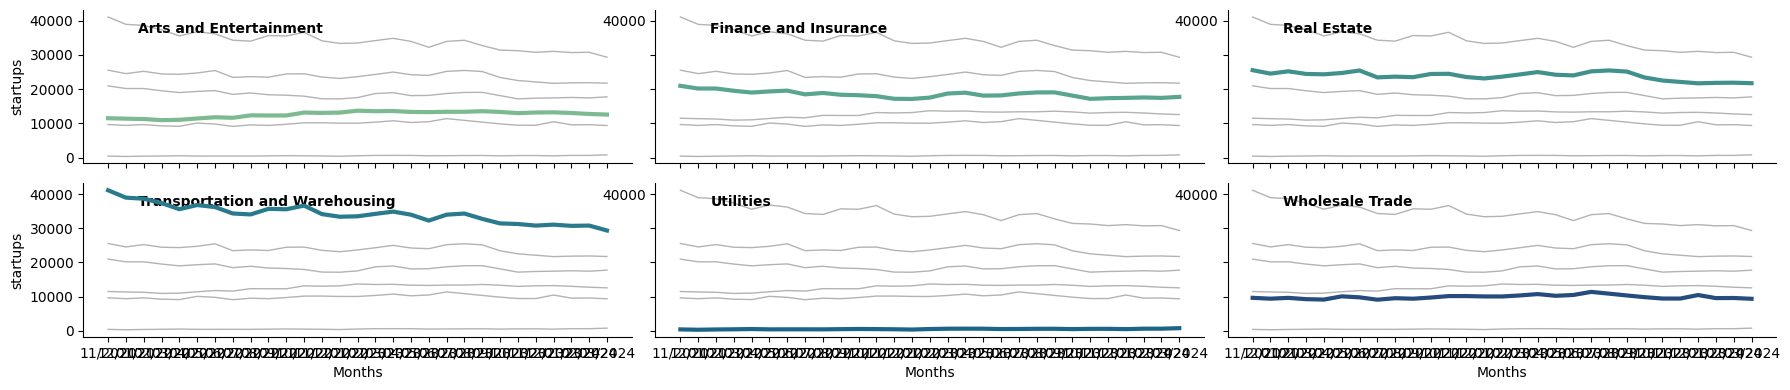

In [101]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=merged,
    x="year", y="startups", col="sector", hue="sector",
    kind="line", palette="crest", linewidth=3, zorder=5,
    col_wrap=3, height=2, aspect=3, legend=False,
)

# Iterate over each subplot to customize further
for sector, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.1, .85, sector, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=merged, x="year", y="startups", units="sector",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )


# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[0:36])
ax.set_xlabel(None)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Months", "startups")
g.tight_layout()
